In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Reading the Excel file

In [78]:
df=pd.read_excel("C:\\Users\\KEY1\\Desktop\\bankruptcy\\bank.xlsx")

In [79]:
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20235,0.465,0.24038,1.5171,-14.547,0.51069,0.25366,0.91816,1.1519,0.42695,...,0.13184,0.47395,0.86816,0.00023951,8.5487,5.1655,107.74,3.3879,5.344,0
1,0.030073,0.59563,0.18668,1.3382,-37.859,-0.00031864,0.04167,0.6789,0.32356,0.40437,...,0.12146,0.074369,0.87235,0,1.5264,0.63305,622.66,0.58619,1.2381,0
2,0.25786,0.29949,0.66519,3.2211,71.799,0,0.31877,2.332,1.6762,0.69841,...,0.16499,0.36921,0.81614,0,4.3325,3.1985,65.215,5.5969,47.466,0
3,0.22716,0.6785,0.042784,1.0828,-88.212,0,0.28505,0.47384,1.3241,0.3215,...,0.29358,0.70657,0.78617,0.48456,5.2309,5.0675,142.46,2.5621,3.0066,0
4,0.085443,0.38039,0.35923,1.9444,21.731,0.1879,0.10823,1.3714,1.1126,0.52167,...,0.10124,0.16379,0.89876,0,5.7035,4.002,89.058,4.0984,5.9874,0
5,0.28784,0.55225,0.31634,1.7033,38.803,0.39012,0.28784,0.80761,1.292,0.446,...,0.22599,0.64537,0.77401,0.22969,7.8151,3.1534,110.83,3.2933,6.3346,0
6,0.15382,0.47248,0.31179,1.6898,-71.985,0,0.19081,1.1165,1.5046,0.52752,...,0.14217,0.2916,0.87368,0.030421,2.6734,7.8093,109.64,3.3291,6.3692,0
7,0.26252,0.45834,0.41704,1.9406,47.511,0,0.26252,1.1818,2.1854,0.54166,...,0.62518,0.48466,0.3859,0,7.7696,4.576,74.055,4.9288,15.658,0
8,0.079147,0.0224,0.89705,283.12,139.75,0,0.097916,43.643,0.61657,0.9776,...,0.16846,0.080961,0.86061,0.014807,14.218,79.203,1.8823,193.91,6.1798,0
9,0.0099006,0.71174,0.065186,1.1485,-62.297,0,0.013459,0.405,1.1738,0.28826,...,0.20309,0.034347,0.83056,0.72047,7.7605,4.1253,136.54,2.6732,2.368,0


In [80]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20235,0.465,0.24038,1.5171,-14.547,0.51069,0.25366,0.91816,1.1519,0.42695,...,0.13184,0.47395,0.86816,0.00023951,8.5487,5.1655,107.74,3.3879,5.344,0
1,0.030073,0.59563,0.18668,1.3382,-37.859,-0.00031864,0.04167,0.6789,0.32356,0.40437,...,0.12146,0.074369,0.87235,0,1.5264,0.63305,622.66,0.58619,1.2381,0
2,0.25786,0.29949,0.66519,3.2211,71.799,0,0.31877,2.332,1.6762,0.69841,...,0.16499,0.36921,0.81614,0,4.3325,3.1985,65.215,5.5969,47.466,0
3,0.22716,0.6785,0.042784,1.0828,-88.212,0,0.28505,0.47384,1.3241,0.3215,...,0.29358,0.70657,0.78617,0.48456,5.2309,5.0675,142.46,2.5621,3.0066,0
4,0.085443,0.38039,0.35923,1.9444,21.731,0.1879,0.10823,1.3714,1.1126,0.52167,...,0.10124,0.16379,0.89876,0,5.7035,4.002,89.058,4.0984,5.9874,0


In [81]:
df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
10168,0.02997,0.66806,0.066243,1.1103,-105.55,0.02997,0.038888,0.48274,1.0292,0.3225,...,0.028377,0.092931,0.97162,0.20982,3.0914,3.9456,192.22,1.8988,3.4199,1
10169,0.012843,0.49306,-0.16062,0.61898,-24.801,0.012843,0.012843,0.9059,1.0145,0.44666,...,0.014247,0.028752,0.98575,0.16009,48.666,63.752,40.071,9.1087,5.1956,1
10170,0.015092,0.55759,-0.2846,0.48599,-85.571,0.015092,0.0098258,0.69488,1.006,0.38746,...,0.0059714,0.03895,0.99403,0.010091,15.053,11.964,114.25,3.1948,2.4201,1
10171,-0.0025542,0.47076,0.42401,1.9007,0.95483,-0.0025542,0.0017845,1.1144,0.99293,0.52464,...,-0.0071218,-0.0048685,1.0071,0,6.4289,5.7025,64.291,5.6773,25.399,1
10172,0.0020717,0.94315,-0.13474,0.85607,-119.92,0.015226,0.0020717,0.059818,1.7749,0.056417,...,0.031154,0.03672,0.9622,0.1328,4.1618,4.9734,192.51,1.896,8.9562,1


In [82]:
df.shape

(10173, 65)

In [83]:
df.dtypes

Attr1     object
Attr2     object
Attr3     object
Attr4     object
Attr5     object
Attr6     object
Attr7     object
Attr8     object
Attr9     object
Attr10    object
Attr11    object
Attr12    object
Attr13    object
Attr14    object
Attr15    object
Attr16    object
Attr17    object
Attr18    object
Attr19    object
Attr20    object
Attr21    object
Attr22    object
Attr23    object
Attr24    object
Attr25    object
Attr26    object
Attr27    object
Attr28    object
Attr29    object
Attr30    object
           ...  
Attr36    object
Attr37    object
Attr38    object
Attr39    object
Attr40    object
Attr41    object
Attr42    object
Attr43    object
Attr44    object
Attr45    object
Attr46    object
Attr47    object
Attr48    object
Attr49    object
Attr50    object
Attr51    object
Attr52    object
Attr53    object
Attr54    object
Attr55    object
Attr56    object
Attr57    object
Attr58    object
Attr59    object
Attr60    object
Attr61    object
Attr62    object
Attr63    obje

# converting objects to float

In [84]:
df.get_dtype_counts()

int64      1
object    64
dtype: int64

In [85]:
df=df.apply(pd.to_numeric,errors='coerce')

In [86]:
df.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
           ...   
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    

In [87]:
df.get_dtype_counts()

float64    64
int64       1
dtype: int64

# deleting the duplicate records

In [88]:
df.shape

(10173, 65)

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df.shape

(10083, 65)

# Descriptive statistics of data

In [91]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10082.000000,10082.000000,10082.000000,10061.000000,10059.000000,10082.000000,10082.000000,10065.000000,10079.000000,10082.000000,...,10021.000000,10081.000000,10045.000000,10081.000000,9544.000000,10067.000000,1.002100e+04,10061.000000,9873.000000,10083.000000
mean,0.042574,0.648754,0.070061,4.157701,-146.673278,-0.113624,0.122134,9.922287,2.880716,0.342729,...,-1.138886,-0.043100,12.759592,3.054694,378.491171,16.935163,8.768886e+02,11.266307,54.341955,0.039472
std,1.116511,6.644778,6.635856,51.944887,7842.209864,6.597275,6.561479,289.672105,97.105064,6.685402,...,86.886127,12.305137,635.734487,239.245881,12347.985196,297.061365,4.375515e+04,234.962258,1530.077857,0.194726
min,-75.331000,0.000000,-479.960000,0.002079,-438000.000000,-508.410000,-75.331000,-1.594500,-0.612590,-479.910000,...,-8534.600000,-979.250000,-4.549700,-189.580000,0.000000,-0.007521,-9.921400e+02,-0.367890,-10677.000000,0.000000
25%,0.000324,0.278078,0.012133,1.029200,-50.182000,0.000000,0.001871,0.392100,1.026950,0.276633,...,0.010307,0.010059,0.872360,0.000000,5.684425,4.702450,4.020100e+01,3.111900,2.319500,0.000000
50%,0.049350,0.487830,0.190130,1.525600,-1.781600,0.000000,0.059801,1.002400,1.290600,0.490840,...,0.054934,0.126880,0.949910,0.004737,10.365000,7.002900,6.952200e+01,5.205000,4.554400,0.000000
75%,0.141492,0.705758,0.400622,2.740900,51.665000,0.072440,0.166238,2.516100,2.266100,0.702527,...,0.133940,0.310150,0.993440,0.249270,22.238500,11.113000,1.162200e+02,9.022600,10.640000,0.000000
max,7.372700,480.960000,5.502200,4881.600000,70686.000000,35.551000,649.230000,18554.000000,9742.300000,74.434000,...,20.200000,147.190000,59672.000000,23853.000000,640000.000000,26862.000000,4.140000e+06,23454.000000,128000.000000,1.000000


# Sum for number of observations with missing values

In [92]:
df.isnull().sum()


Attr1        1
Attr2        1
Attr3        1
Attr4       22
Attr5       24
Attr6        1
Attr7        1
Attr8       18
Attr9        4
Attr10       1
Attr11       1
Attr12      22
Attr13      62
Attr14       1
Attr15      12
Attr16      19
Attr17      18
Attr18       1
Attr19      63
Attr20      62
Attr21    3159
Attr22       1
Attr23      62
Attr24     225
Attr25       1
Attr26      19
Attr27     703
Attr28     210
Attr29       1
Attr30      62
          ... 
Attr36       1
Attr37    4485
Attr38       1
Attr39      62
Attr40      22
Attr41     197
Attr42      62
Attr43      62
Attr44      62
Attr45     537
Attr46      22
Attr47      74
Attr48       2
Attr49      62
Attr50      18
Attr51       1
Attr52      74
Attr53     210
Attr54     210
Attr55       1
Attr56      62
Attr57       2
Attr58      38
Attr59       2
Attr60     539
Attr61      16
Attr62      62
Attr63      22
Attr64     210
class        0
Length: 65, dtype: int64

#  Displaying the frequency chart for output variable (bstatus = bankruptcy status)

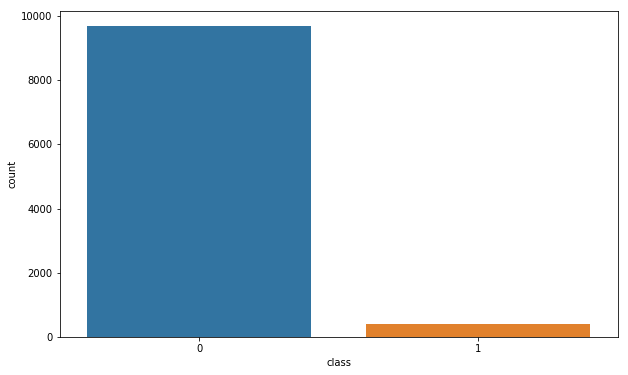

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x='class',data = df)

In [94]:
df['class'].value_counts()

0    9685
1     398
Name: class, dtype: int64

# find the no:of attributes for which the contribution percentage is less than 50%

In [95]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [96]:
missing_value_df.sort_values(ascending=False,by='percent_missing')

,column_name,percent_missing
Attr37,Attr37,44.480809
Attr21,Attr21,31.329961
Attr27,Attr27,6.972131
Attr60,Attr60,5.345631
Attr45,Attr45,5.325796
Attr24,Attr24,2.231479
Attr53,Attr53,2.082713
Attr64,Attr64,2.082713
Attr28,Attr28,2.082713
Attr54,Attr54,2.082713


In [97]:

rslt_df = missing_value_df[missing_value_df['percent_missing'] > 50] 

In [98]:
rslt_df


,column_name,percent_missing


# To find the number of records for which the no:of missing attribute values >80

In [99]:
df.shape

(10083, 65)

In [100]:
df.apply(lambda x: x.count(), axis=1)


0        65
1        62
2        63
3        64
4        64
5        65
6        64
7        63
8        64
9        65
10       63
11       63
12       64
13       65
14       65
15       65
16       65
17       64
18       65
19       63
20       64
21       62
22       64
23       65
24       63
25       64
26       63
27       63
28       62
29       65
         ..
10143    65
10144    65
10145    62
10146    64
10147    65
10148    63
10149    57
10150    64
10151    64
10152    63
10153    63
10154    61
10155    61
10156    64
10157    64
10158    63
10159    64
10160    64
10161    63
10162    64
10163    48
10164    65
10165    64
10166    65
10167    64
10168    64
10169    64
10170    64
10171    63
10172    65
Length: 10083, dtype: int64

In [101]:
missing_rowvalues=df.isnull().sum(axis=1)*100/64

In [102]:
missing_rowvalues.sort_values(ascending=False)

7356    56.2500
9228    54.6875
7325    54.6875
7271    54.6875
4569    54.6875
4200    51.5625
8504    51.5625
1832    46.8750
2583    43.7500
7979    39.0625
1251    37.5000
9394    37.5000
5760    35.9375
1111    35.9375
9867    35.9375
6905    35.9375
8876    35.9375
462     35.9375
4545    34.3750
460     34.3750
2560    34.3750
389     34.3750
7036    34.3750
4065    34.3750
8051    34.3750
1821    34.3750
5945    34.3750
1495    34.3750
334     34.3750
7873    32.8125
         ...   
5683     0.0000
5686     0.0000
5689     0.0000
5691     0.0000
5692     0.0000
5694     0.0000
5696     0.0000
5656     0.0000
5655     0.0000
5652     0.0000
5633     0.0000
5617     0.0000
5620     0.0000
5621     0.0000
5623     0.0000
5624     0.0000
5627     0.0000
5629     0.0000
5632     0.0000
5638     0.0000
5651     0.0000
5639     0.0000
5641     0.0000
5642     0.0000
5643     0.0000
5644     0.0000
5646     0.0000
5647     0.0000
5650     0.0000
0        0.0000
Length: 10083, dtype: fl

# To create a new copy of data without class labels for processing further

In [103]:
new_df = df.copy()
new_df.drop(['class'], axis = 1, inplace = True)
new_df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.202350,0.465000,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,243000.0000,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.74000,3.38790,5.34400
1,0.030073,0.595630,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,2179.5000,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.66000,0.58619,1.23810
2,0.257860,0.299490,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,3668.6000,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.21500,5.59690,47.46600
3,0.227160,0.678500,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,1273.8000,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.46000,2.56210,3.00660
4,0.085443,0.380390,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,18209.0000,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.05800,4.09840,5.98740
5,0.287840,0.552250,0.316340,1.70330,38.80300,0.390120,0.287840,0.807610,1.29200,0.446000,...,8040.8000,0.225990,0.645370,0.77401,0.229690,7.8151,3.15340,110.83000,3.29330,6.33460
6,0.153820,0.472480,0.311790,1.68980,-71.98500,0.000000,0.190810,1.116500,1.50460,0.527520,...,9246.0000,0.142170,0.291600,0.87368,0.030421,2.6734,7.80930,109.64000,3.32910,6.36920
7,0.262520,0.458340,0.417040,1.94060,47.51100,0.000000,0.262520,1.181800,2.18540,0.541660,...,1757.0000,0.625180,0.484660,0.38590,0.000000,7.7696,4.57600,74.05500,4.92880,15.65800
8,0.079147,0.022400,0.897050,283.12000,139.75000,0.000000,0.097916,43.643000,0.61657,0.977600,...,16992.0000,0.168460,0.080961,0.86061,0.014807,14.2180,79.20300,1.88230,193.91000,6.17980
9,0.009901,0.711740,0.065186,1.14850,-62.29700,0.000000,0.013459,0.405000,1.17380,0.288260,...,1.1485,0.203090,0.034347,0.83056,0.720470,7.7605,4.12530,136.54000,2.67320,2.36800


# To replace NaN values with mean

In [104]:
new_df=new_df.fillna(new_df.mean())

In [105]:
new_df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.202350,0.465000,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,243000.0000,0.131840,0.473950,0.868160,0.000240,8.548700,5.16550,107.740000,3.38790,5.344000
1,0.030073,0.595630,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,2179.5000,0.121460,0.074369,0.872350,0.000000,1.526400,0.63305,622.660000,0.58619,1.238100
2,0.257860,0.299490,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,3668.6000,0.164990,0.369210,0.816140,0.000000,4.332500,3.19850,65.215000,5.59690,47.466000
3,0.227160,0.678500,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,1273.8000,0.293580,0.706570,0.786170,0.484560,5.230900,5.06750,142.460000,2.56210,3.006600
4,0.085443,0.380390,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,18209.0000,0.101240,0.163790,0.898760,0.000000,5.703500,4.00200,89.058000,4.09840,5.987400
5,0.287840,0.552250,0.316340,1.70330,38.80300,0.390120,0.287840,0.807610,1.29200,0.446000,...,8040.8000,0.225990,0.645370,0.774010,0.229690,7.815100,3.15340,110.830000,3.29330,6.334600
6,0.153820,0.472480,0.311790,1.68980,-71.98500,0.000000,0.190810,1.116500,1.50460,0.527520,...,9246.0000,0.142170,0.291600,0.873680,0.030421,2.673400,7.80930,109.640000,3.32910,6.369200
7,0.262520,0.458340,0.417040,1.94060,47.51100,0.000000,0.262520,1.181800,2.18540,0.541660,...,1757.0000,0.625180,0.484660,0.385900,0.000000,7.769600,4.57600,74.055000,4.92880,15.658000
8,0.079147,0.022400,0.897050,283.12000,139.75000,0.000000,0.097916,43.643000,0.61657,0.977600,...,16992.0000,0.168460,0.080961,0.860610,0.014807,14.218000,79.20300,1.882300,193.91000,6.179800
9,0.009901,0.711740,0.065186,1.14850,-62.29700,0.000000,0.013459,0.405000,1.17380,0.288260,...,1.1485,0.203090,0.034347,0.830560,0.720470,7.760500,4.12530,136.540000,2.67320,2.368000


In [106]:
new_df.head(15)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.253660,0.91816,1.15190,0.42695,...,243000.0000,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.7400,3.38790,5.34400
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.041670,0.67890,0.32356,0.40437,...,2179.5000,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.6600,0.58619,1.23810
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.318770,2.33200,1.67620,0.69841,...,3668.6000,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.2150,5.59690,47.46600
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.285050,0.47384,1.32410,0.32150,...,1273.8000,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.4600,2.56210,3.00660
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.108230,1.37140,1.11260,0.52167,...,18209.0000,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.0580,4.09840,5.98740
5,0.287840,0.55225,0.316340,1.7033,38.803,0.390120,0.287840,0.80761,1.29200,0.44600,...,8040.8000,0.225990,0.645370,0.77401,0.229690,7.8151,3.15340,110.8300,3.29330,6.33460
6,0.153820,0.47248,0.311790,1.6898,-71.985,0.000000,0.190810,1.11650,1.50460,0.52752,...,9246.0000,0.142170,0.291600,0.87368,0.030421,2.6734,7.80930,109.6400,3.32910,6.36920
7,0.262520,0.45834,0.417040,1.9406,47.511,0.000000,0.262520,1.18180,2.18540,0.54166,...,1757.0000,0.625180,0.484660,0.38590,0.000000,7.7696,4.57600,74.0550,4.92880,15.65800
8,0.079147,0.02240,0.897050,283.1200,139.750,0.000000,0.097916,43.64300,0.61657,0.97760,...,16992.0000,0.168460,0.080961,0.86061,0.014807,14.2180,79.20300,1.8823,193.91000,6.17980
9,0.009901,0.71174,0.065186,1.1485,-62.297,0.000000,0.013459,0.40500,1.17380,0.28826,...,1.1485,0.203090,0.034347,0.83056,0.720470,7.7605,4.12530,136.5400,2.67320,2.36800


In [107]:
#plt.hist(new_df.iloc[:,1:10])

In [108]:
#k=new_df.iloc[:,1:10]
#plt.hist(k)

In [109]:
#new_df.hist(column='Attr1','Attr2','Attr10')

# skewness

In [110]:
new_df.skew()

Attr1     -54.705055
Attr2      67.038828
Attr3     -67.180516
Attr4      83.582703
Attr5     -39.829820
Attr6     -67.559669
Attr7      95.790950
Attr8      56.576351
Attr9     100.158369
Attr10    -65.673854
Attr11     97.745958
Attr12     59.526059
Attr13     81.432819
Attr14     95.790950
Attr15     -9.714612
Attr16     56.214059
Attr17     56.578098
Attr18     94.628344
Attr19     95.106415
Attr20     57.416557
Attr21     85.303720
Attr22     97.979281
Attr23     95.593290
Attr24     94.067182
Attr25    -64.197162
Attr26     66.417121
Attr27     85.167169
Attr28     51.181868
Attr29     -0.044156
Attr30     93.560671
             ...    
Attr35     98.485231
Attr36    100.154126
Attr37     51.929407
Attr38    -65.781746
Attr39    -66.327922
Attr40     93.171038
Attr41     10.130128
Attr42    -70.077064
Attr43     85.691241
Attr44     87.590559
Attr45     91.669668
Attr46     84.945943
Attr47    100.199273
Attr48     96.929447
Attr49    -69.425125
Attr50     91.479695
Attr51     67

In [111]:
#new_d.columns
#len(new_d.columns)

In [112]:
#for i in range(64):
    # print ("Skew is:",new_df.columns[i], new_df.iloc[i].skew())
    #l= new_df.iloc[i].skew()
    #if l < 0 :
        #j = np.exp(new_df.iloc[i])
        #print ("Skew is:",new_df.columns[i],j)
    #else:
        #j = np.log(new_df.iloc[i])
        #print ("Skew is:",new_df.columns[i],j)
        


# Outlier

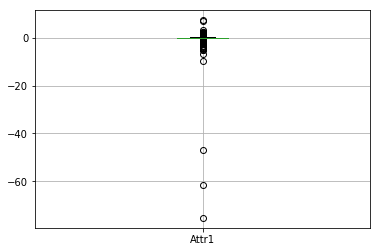

In [113]:
new_df.boxplot(column='Attr1')

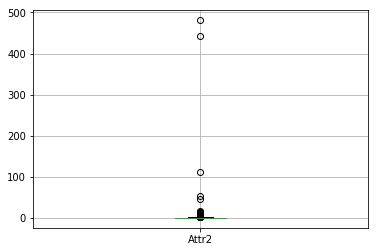

In [114]:
new_df.boxplot(column='Attr2')

# Use Zscore for outlier detection

In [115]:


from scipy import stats
z = np.abs(stats.zscore(new_df))
print(z)

[[0.14311689 0.02765663 0.02566902 ... 0.01763364 0.03356883 0.03236359]
 [0.01119788 0.00799563 0.01757582 ... 0.00582849 0.04550654 0.03507558]
 [0.19283922 0.05256738 0.08969274 ... 0.01860858 0.02415658 0.00454163]
 ...
 [0.0246169  0.013721   0.05345146 ... 0.01748439 0.0343916  0.03429486]
 [0.04042325 0.0267897  0.05334416 ... 0.01862976 0.02381401 0.01911708]
 [0.03627966 0.04430927 0.03086585 ... 0.01569019 0.03992562 0.0299777 ]]


In [116]:
threshold = 3
print(np.where(z > 3))

(array([    0,     0,     8,     8,     8,    63,    72,    93,    98,
         179,   196,   234,   295,   297,   333,   333,   348,   348,
         348,   348,   367,   380,   388,   388,   388,   388,   388,
         388,   388,   394,   400,   406,   407,   418,   427,   427,
         431,   431,   459,   460,   528,   529,   529,   530,   593,
         596,   598,   610,   638,   739,   768,   772,   778,   796,
         924,   989,  1011,  1021,  1027,  1061,  1061,  1096,  1101,
        1101,  1108,  1158,  1178,  1230,  1230,  1248,  1269,  1284,
        1284,  1284,  1284,  1284,  1284,  1284,  1284,  1284,  1284,
        1284,  1308,  1370,  1445,  1445,  1445,  1447,  1453,  1453,
        1453,  1453,  1453,  1453,  1453,  1453,  1455,  1455,  1476,
        1502,  1502,  1502,  1502,  1503,  1503,  1505,  1516,  1538,
        1538,  1545,  1545,  1545,  1545,  1545,  1545,  1555,  1579,
        1579,  1644,  1658,  1663,  1696,  1718,  1731,  1731,  1748,
        1748,  1748

# Remove outliers

In [117]:
def winsorize_series(s):
    q = s.quantile([0.05, 0.95])
    if isinstance(q, pd.Series) and len(q) == 2:
        s[s < q.iloc[0]] = q.iloc[0]
        s[s > q.iloc[1]] = q.iloc[1]
    return s

def winsorize_df(new_df):
    return new_df.apply(winsorize_series, axis=0)

In [118]:
new_df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.202350,0.465000,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,243000.0000,0.131840,0.473950,0.868160,0.000240,8.548700,5.16550,107.740000,3.38790,5.344000
1,0.030073,0.595630,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,2179.5000,0.121460,0.074369,0.872350,0.000000,1.526400,0.63305,622.660000,0.58619,1.238100
2,0.257860,0.299490,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,3668.6000,0.164990,0.369210,0.816140,0.000000,4.332500,3.19850,65.215000,5.59690,47.466000
3,0.227160,0.678500,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,1273.8000,0.293580,0.706570,0.786170,0.484560,5.230900,5.06750,142.460000,2.56210,3.006600
4,0.085443,0.380390,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,18209.0000,0.101240,0.163790,0.898760,0.000000,5.703500,4.00200,89.058000,4.09840,5.987400
5,0.287840,0.552250,0.316340,1.70330,38.80300,0.390120,0.287840,0.807610,1.29200,0.446000,...,8040.8000,0.225990,0.645370,0.774010,0.229690,7.815100,3.15340,110.830000,3.29330,6.334600
6,0.153820,0.472480,0.311790,1.68980,-71.98500,0.000000,0.190810,1.116500,1.50460,0.527520,...,9246.0000,0.142170,0.291600,0.873680,0.030421,2.673400,7.80930,109.640000,3.32910,6.369200
7,0.262520,0.458340,0.417040,1.94060,47.51100,0.000000,0.262520,1.181800,2.18540,0.541660,...,1757.0000,0.625180,0.484660,0.385900,0.000000,7.769600,4.57600,74.055000,4.92880,15.658000
8,0.079147,0.022400,0.897050,283.12000,139.75000,0.000000,0.097916,43.643000,0.61657,0.977600,...,16992.0000,0.168460,0.080961,0.860610,0.014807,14.218000,79.20300,1.882300,193.91000,6.179800
9,0.009901,0.711740,0.065186,1.14850,-62.29700,0.000000,0.013459,0.405000,1.17380,0.288260,...,1.1485,0.203090,0.034347,0.830560,0.720470,7.760500,4.12530,136.540000,2.67320,2.368000


# Correlation

In [119]:
corr=new_df.corr()


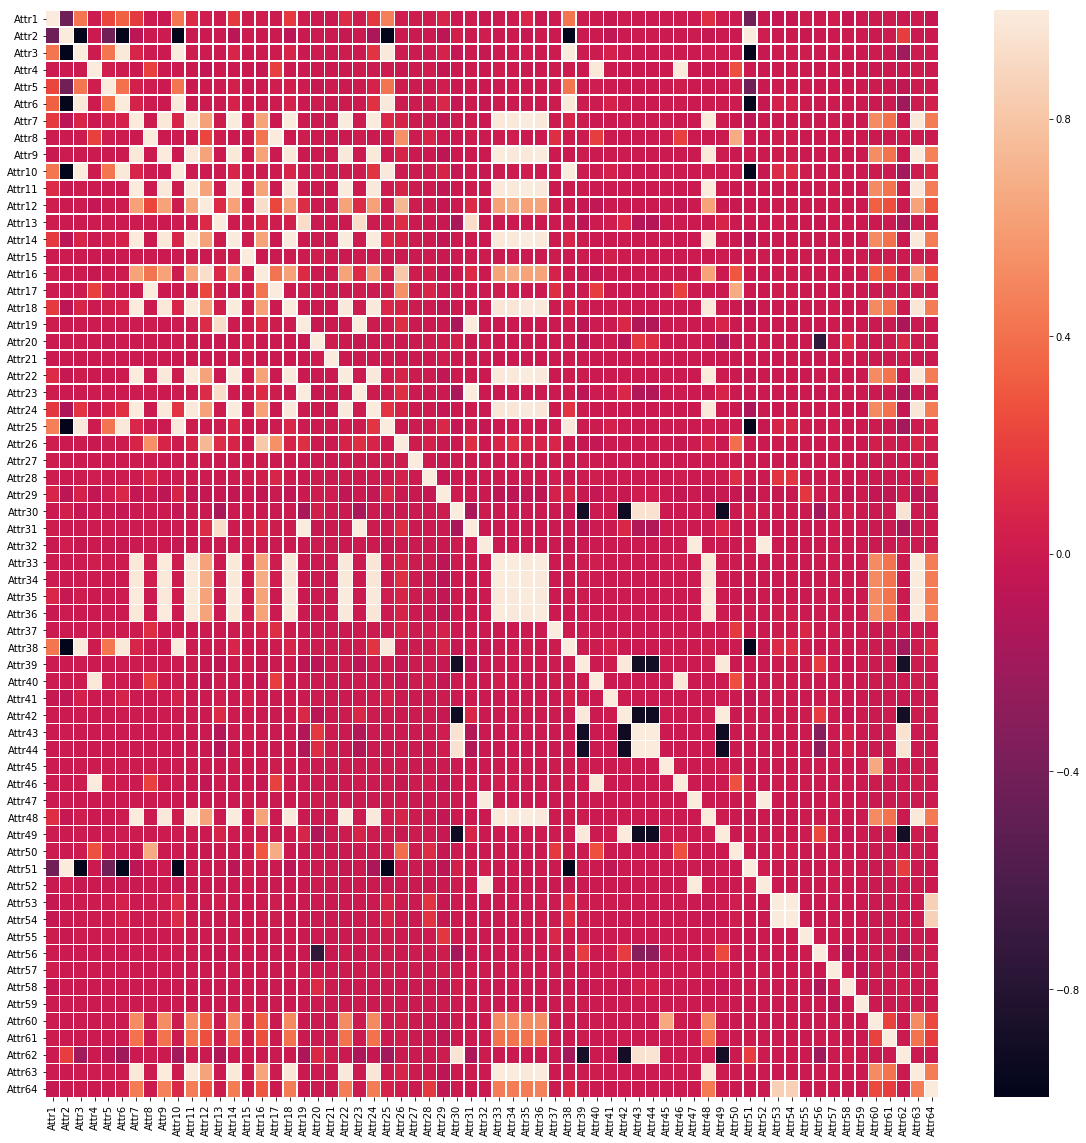

In [120]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr,annot = False, linewidths=0.5, ax=ax)

# delete the highly correlated attributes

In [121]:
corr_matrix=new_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [122]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
new_df.drop(new_df[to_drop], axis=1,inplace=True)

In [123]:
len(new_df.columns)

34

In [124]:
new_df.columns

Index(['Attr1', 'Attr2', 'Attr4', 'Attr5', 'Attr7', 'Attr8', 'Attr12',
       'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21', 'Attr26',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr32', 'Attr37', 'Attr39',
       'Attr41', 'Attr43', 'Attr45', 'Attr50', 'Attr53', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr64'],
      dtype='object')

# Check multicollinearity using VIF and drop the features having high collinearity

In [125]:
new_df.columns

Index(['Attr1', 'Attr2', 'Attr4', 'Attr5', 'Attr7', 'Attr8', 'Attr12',
       'Attr13', 'Attr15', 'Attr16', 'Attr19', 'Attr20', 'Attr21', 'Attr26',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr32', 'Attr37', 'Attr39',
       'Attr41', 'Attr43', 'Attr45', 'Attr50', 'Attr53', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr64'],
      dtype='object')

In [126]:
ColumnsList=list(new_df.columns)
ColumnsList.remove('Attr1')
features = "+".join(ColumnsList)

In [127]:
y, X = dmatrices('Attr1 ~' + features, new_df, return_type='dataframe')



In [128]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [129]:
vif.round(1).sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
9,157.2,Attr16
13,78.9,Attr26
4,39.4,Attr7
6,31.3,Attr12
0,24.7,Intercept
33,19.0,Attr64
17,15.5,Attr30
25,14.7,Attr53
22,14.1,Attr43
20,8.8,Attr39


In [130]:
new_df.shape

(10083, 34)

In [131]:
vift=vif.copy()
vift=vift[vift['VIF Factor']>5]
vift.reset_index(inplace=True)

iLoopEnd=len(vift)
for iLoop in range(0,iLoopEnd):
    strColName=str(vift.loc[iLoop,'features']).strip()
    if strColName !='Attr1' and strColName !='Intercept':
        new_df.drop(strColName,axis=1,inplace=True)

new_df

,Attr1,Attr2,Attr4,Attr5,Attr8,Attr15,Attr20,Attr21,Attr27,Attr28,...,Attr37,Attr41,Attr45,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61
0,0.202350,0.465000,1.51710,-14.54700,0.918160,603.2000,42.697000,1.080600,1.634500,0.815590,...,5095.300000,0.060856,1.098300,243000.0000,0.131840,0.473950,0.868160,0.000240,8.548700,5.16550
1,0.030073,0.595630,1.33820,-37.85900,0.678900,4613.9000,239.120000,2.664538,79.752000,0.714320,...,83.484618,0.416710,0.141870,2179.5000,0.121460,0.074369,0.872350,0.000000,1.526400,0.63305
2,0.257860,0.299490,3.22110,71.79900,2.332000,330.2900,84.246000,1.114600,52.886000,18.836000,...,83.484618,0.031507,0.666490,3668.6000,0.164990,0.369210,0.816140,0.000000,4.332500,3.19850
3,0.227160,0.678500,1.08280,-88.21200,0.473840,820.5200,69.778000,1.270400,3.952100,0.097146,...,1.967100,0.057077,0.897400,1273.8000,0.293580,0.706570,0.786170,0.484560,5.230900,5.06750
4,0.085443,0.380390,1.94440,21.73100,1.371400,997.0100,63.995000,1.359600,1.344200,1.379700,...,83.484618,0.057007,0.312590,18209.0000,0.101240,0.163790,0.898760,0.000000,5.703500,4.00200
5,0.287840,0.552250,1.70330,38.80300,0.807610,683.1700,46.705000,1.673200,2.872000,1.352700,...,5.628600,0.053954,1.518500,8040.8000,0.225990,0.645370,0.774010,0.229690,7.815100,3.15340
6,0.153820,0.472480,1.68980,-71.98500,1.116500,837.5700,136.530000,1.064900,7.932000,1.319800,...,12.522000,0.067474,0.273310,9246.0000,0.142170,0.291600,0.873680,0.030421,2.673400,7.80930
7,0.262520,0.458340,1.94060,47.51100,1.181800,218.1400,46.978000,1.116500,0.000000,2.988100,...,83.484618,0.030290,0.933330,1757.0000,0.625180,0.484660,0.385900,0.000000,7.769600,4.57600
8,0.079147,0.022400,283.12000,139.75000,43.643000,68.1110,25.671000,1.022900,1.225200,8.991000,...,59.195000,0.005729,1.825200,16992.0000,0.168460,0.080961,0.860610,0.014807,14.218000,79.20300
9,0.009901,0.711740,1.14850,-62.29700,0.405000,4662.4000,47.033000,0.915560,0.799860,0.131500,...,1.699900,0.292190,0.065455,1.1485,0.203090,0.034347,0.830560,0.720470,7.760500,4.12530


# Normalization

In [142]:
scaler = StandardScaler()
scaler = scaler.fit(new_df)

In [143]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [147]:
normalized = scaler.transform(new_df)



In [148]:
normalized

array([[ 0.14311689, -0.02765663, -0.05089274, ..., -0.01276891,
        -0.03079573, -0.03965375],
       [-0.01119788, -0.00799563, -0.05434071, ..., -0.01276991,
        -0.0313803 , -0.05492425],
       [ 0.19283922, -0.05256738, -0.01805126, ..., -0.01276991,
        -0.03114671, -0.04628087],
       ...,
       [-0.0246169 , -0.013721  , -0.07076549, ..., -0.01272773,
        -0.03025428, -0.01674859],
       [-0.04042325, -0.0267897 , -0.04349955, ..., -0.01276991,
        -0.03097219, -0.03784452],
       [-0.03627966,  0.04430927, -0.06363288, ..., -0.01221475,
        -0.03116092, -0.04030097]])

In [139]:
df_normalized=(new_df - new_df.mean())/new_df.std()

In [149]:
normalized=pd.DataFrame(normalized)

In [151]:
normalized.skew(axis = 0)

0     -54.705055
1      67.038828
2      83.582703
3     -39.829820
4      56.576351
5      -9.714612
6      57.416557
7      85.303720
8      85.167169
9      51.181868
10     -0.044156
11    100.219627
12     51.929407
13     10.130128
14     91.669668
15     26.857163
16    -95.338605
17    -61.188560
18     84.640272
19     98.432863
20     47.055007
21     80.454739
dtype: float64

# split the data in 80:20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df, df['class'], test_size=0.2)

In [ ]:
X_test.shape

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
model=logreg.fit(X_train,y_train)

In [ ]:
predict=model.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict)
print(confusion_matrix)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))


In [ ]:
df_normalized.skew()